In [28]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin, exp
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from copy import copy
from numpy import sin, cos, pi
import random
from numpy import loadtxt
from numpy import arange
%matplotlib inline

### Ex 1

In [29]:
tolerancia = 1e-4

# Inicializar
# 1m com espaçamento de 1cm  (100x100)
grelha = np.zeros((100,100))
grelha[0] = 1


In [30]:
grelha

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

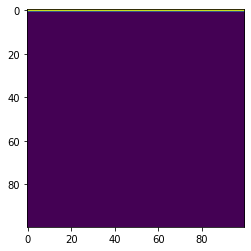

In [31]:
plt.imshow(grelha)
plt.show()

1897 iterações..


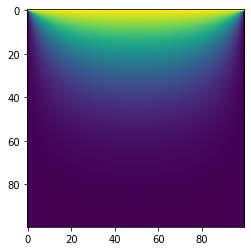

In [32]:
# ISTO É JACOBI NAO Gauss-Seidel
i = 0
while True:
    i += 1
    atual = grelha.copy()

    for row in range(len(grelha)):
        for col in range(len(grelha)):

            # Não é para alterar
            if row in [0, len(grelha)-1] or col in [0, len(grelha)-1]:
                atual[row, col] = grelha[row, col]

            else:
                atual[row, col] = (grelha[row, col+1] + grelha[row, col-1] + grelha[row+1, col] + grelha[row-1, col]) / 4

    if np.max(np.abs(atual - grelha)) < tolerancia:
        break

    grelha = atual.copy()


    
print(f"{i} iterações..")

# Show with imshow
plt.imshow(grelha)
plt.show()

1958 iterações..


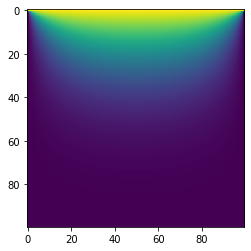

In [33]:
# ISTO É JACOBI NAO Gauss-Seidel w/relaxação
# TODO: DEVIA SER MAIS RAPIDO; DA MALLLLLL

tolerancia = 1e-4

# Inicializar
# 1m com espaçamento de 1cm  (100x100)
grelha = np.zeros((100,100))
grelha[0] = 1

# w é a importancia da iteração atual com a anterior
omega = 0.9

i = 0
while True:
    i += 1
    atual = grelha.copy()

    for row in range(len(grelha)):
        for col in range(len(grelha)):

            # Não é para alterar
            if not(row in [0, len(grelha)-1] or col in [0, len(grelha)-1]):
                atual[row, col] = (omega/4) * (grelha[row, col+1] + grelha[row, col-1] + grelha[row+1, col] + grelha[row-1, col]) + (1-omega) * grelha[row, col]

    #print(np.max(np.abs(atual - grelha)))
    if np.max(np.abs(atual - grelha)) < tolerancia:
        break

    grelha = atual#.copy()


    
print(f"{i} iterações..")

# Show with imshow
plt.imshow(grelha)
plt.show()

### Ex 2

### Ex 3

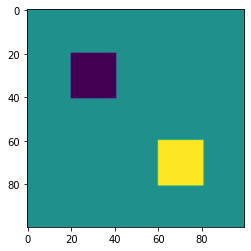

In [34]:
# GABI
# Exercicio 3
L=1
p=0.01
w=1
pontos=L/p

pontos=L/p
mapa=np.zeros((int(pontos),int(pontos)))
rho=np.zeros((int(pontos),int(pontos)))
de=mapa.copy()
for i in range(60,81):
    for j in range(60,81):
        rho[i][j]=1
for i in range(20,41):
    for j in range(20,41):
        rho[i][j]=-1



plt.imshow(rho)
plt.show()

In [35]:

delta=1
while delta>10**(-6):
    print(delta, end='\r')
    i=1
    while i <int(pontos)-1:
        j=1
        while j<int(pontos)-1:
            c=(mapa[i][j])
            mapa[i][j]=w*(mapa[i+1][j]+mapa[i-1][j]+mapa[i][j+1]+mapa[i][j-1]+(0.01**2)*rho[i][j])/4+(1-w)*mapa[i][j]
            #mapa[i][j]=(mapa[i+1][j]+mapa[i-1][j]+mapa[i][j+1]+mapa[i][j-1])/4
            de[i][j]=abs(mapa[i][j]-c)
            j=j+1
        i=i+1
    #print('aqui')
    delta=np.max(de)
    #print(delta)

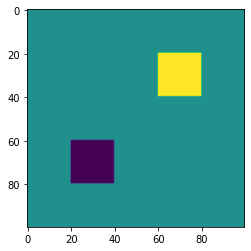

In [49]:
# Inicializar
# 1m com espaçamento de 1cm  (100x100)
h = 0.001 # L/M lado sobre a quantidade de pontos do lado

original = np.zeros((100,100))

original[20:40, -40:-20] = 1
original[-40:-20, 20:40] = -1

plt.imshow(original)
plt.show()

D25 aula 11

Error: 4.999999920697624e-07
2 iterações..


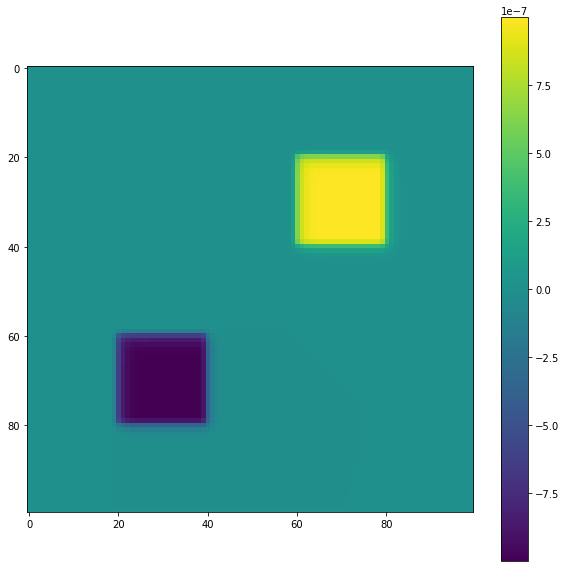

In [50]:
tolerancia = 10**(-6)
count = 0
omega = 1 # w é a importancia da iteração atual com a anterior


# Vai ser o final
mapa = np.zeros(original.shape)

anterior = original.copy()

while True:
    count += 1
    
    for row in range(len(original)-1):
        for col in range(len(original)-1):

            # Não é para alterar
            if not(row in [0, len(original)-1] or col in [0, len(original)-1]):

                mapa[row, col] = omega * (mapa[row, col+1] + mapa[row, col-1] + mapa[row+1, col] + mapa[row-1, col] + original[row, col]*(h**2))/4 + (1-omega) * mapa[row, col]
                #i = row
                #j = col
                #mapa[i,j] = (1+omega)*(mapa[i-1,j]+mapa[i+1,j]+mapa[i,j-1]+mapa[i,j+1])/4 - omega*mapa[i,j]

    delta = np.max(np.abs(anterior- mapa))
    
    print(f"Error: {delta}", end='\r')

    if delta < tolerancia:
        break

    anterior = mapa.copy()

print(f"\n{count} iterações..")

plt.figure(figsize=(10,10))
plt.imshow(mapa)

plt.colorbar()
plt.show()


### Ex 4

In [38]:
def t0(t):
    return 10+12*sin((2*pi*t) /365)

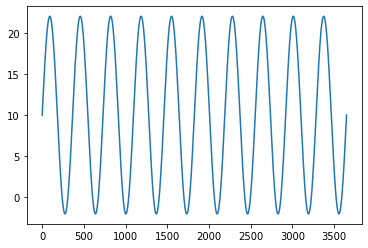

In [39]:
x = np.linspace(0, 365*10, num=365*100)
y = [t0(t) for t in x]

plt.plot(x, y)

Ver slides ultima aula

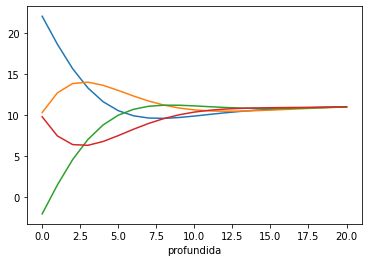

In [40]:
# Constantes
L=20
D=0.1
N=20
a=L/N # espaçamento
h=1

t0=0
t1=3376
t2=3467
t3=3558
t4=3650

tlo=11
tmid=10

def thi(t):
    return 10+12*np.sin(t*2*np.pi/365)

T=np.empty(N+1,float)
T[0]=10
T[N]=tlo
T[1:N]=tmid

Tp=np.empty(N+1,float)
Tp[0]=10
Tp[N]=tlo

t=0.0
c=h*D/(a**2)

while t<=365*10:
    T[0]=float(thi(t))
    Tp[0]=float(thi(t))
   
    for i in range(1,N):
        Tp[i]=T[i]+c*(T[i+1]+T[i-1]-2*T[i])

    T,Tp = Tp,T
    t+=h

    if t==t1:
        plt.plot(T,label='t1')
    if t==t2:
        plt.plot(T,label='t2')
    if t==t3:
        plt.plot(T,label='t3')
    if t==t4:
        plt.plot(T,label='t4')
plt.xlabel('profundida')
plt.show()